<font color='orange'>**DSBDAL Ass. 3 -  Descriptive Statistics - Measures of Central Tendency and variability**</font><br/>

#### Perform the following operations on any open source dataset.

##### 1. Provide summary statistics (mean, median, minimum, maximum, standard deviation) for a dataset with numeric variables grouped by one of the qualitative variable. Create a list that contains a numeric value for each response to the categorical variable.

#### **0. Loading the Dataset**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sns.get_dataset_names()[5:10]

['diamonds', 'dots', 'dowjones', 'exercise', 'flights']

In [ ]:
df = sns.load_dataset('flights')
df.to_csv('3_data.csv', index=False)

In [ ]:
df = pd.read_csv('3_data.csv')

#### **1. Exploration**

In [ ]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
df.shape

(144, 3)

In [ ]:
df.isna().sum()

year          0
month         0
passengers    0
dtype: int64

In [ ]:
df.dtypes

year           int64
month         object
passengers     int64
dtype: object

#### **2. Summary Statistics of Passenger (numerical) wrt Year,Month (categorical)**

In [ ]:
df.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [ ]:
from IPython.display import display, HTML

for x in ['month','year']:
    mean = df.groupby(x)['passengers'].mean()
    median = df.groupby(x)['passengers'].median()
    deviation = df.groupby(x)['passengers'].std()
    aggr = df.groupby(x)['passengers'].sum()
    mini = df.groupby(x)['passengers'].min()
    maxi = df.groupby(x)['passengers'].max()

    cols = ['mean','median','min','max','sum','std']
    unique = df[x].unique()
    df_temp = pd.DataFrame(columns=cols, index=unique)
    for i in unique:
        df_temp.loc[i] = [mean[i],median[i], mini[i], maxi[i], aggr[i], deviation[i]]
    
    print('\nSummary Statistics of Passengers grouped by "',x,'" :')
    display(HTML(df_temp.to_html()))


Summary Statistics of Passengers grouped by " month " :


,mean,median,min,max,sum,std
Jan,241.75,223.0,112,417,2901,101.03296
Feb,235.0,214.5,118,391,2820,89.619397
Mar,270.166667,251.5,132,419,3242,100.559194
Apr,267.083333,252.0,129,461,3205,107.374839
May,271.833333,252.0,121,472,3262,114.73989
Jun,311.666667,289.5,135,535,3740,134.219856
Jul,351.333333,333.0,148,622,4216,156.827255
Aug,351.083333,320.0,148,606,4213,155.783333
Sep,302.416667,285.5,136,508,3629,123.95414
Oct,266.583333,251.5,119,461,3199,110.744964



Summary Statistics of Passengers grouped by " year " :


,mean,median,min,max,sum,std
1949,126.666667,125.0,104,148,1520,13.720147
1950,139.666667,137.5,114,170,1676,19.070841
1951,170.166667,169.0,145,199,2042,18.438267
1952,197.0,192.0,171,242,2364,22.966379
1953,225.0,232.0,180,272,2700,28.466887
1954,238.916667,231.5,188,302,2867,34.924486
1955,284.0,272.0,233,364,3408,42.140458
1956,328.25,315.0,271,413,3939,47.86178
1957,368.416667,351.5,301,467,4421,57.890898
1958,381.0,360.5,310,505,4572,64.530472


#### **3. Plotting the Mean of Passengers wrt Month**

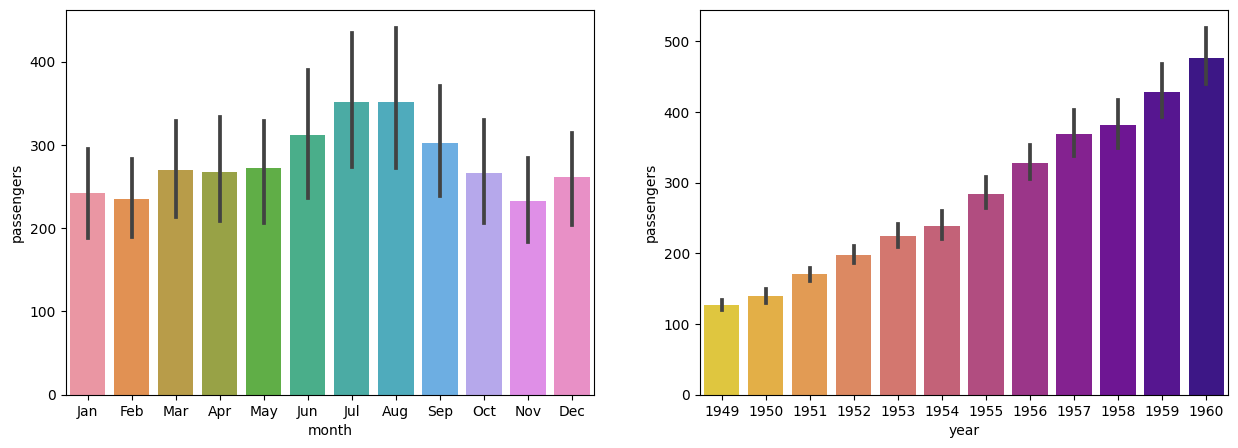

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=axes[0], y=df['passengers'], x='month', data=df);
sns.barplot(ax=axes[1], y=df['passengers'], x='year', data=df, palette="plasma_r");

##### 2. Write a Python program to display some basic statistical details like percentile, mean, standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-versicolor’ of iris.csv dataset. Provide the codes with outputs and explain everything that you do in this step.

#### **0. Loading the Dataset**

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
species = df.species.unique()

#### **1. Summary Statistics of Features wrt Species**

In [ ]:
from IPython.display import display, HTML

# For demonstrating percentiles, I've included the first and the third quartiles.
q1, q3 = df.groupby('species').quantile(0.25),df.groupby('species').mean(0.75)
mean = df.groupby('species').mean()
median = df.groupby('species').median()
deviation = df.groupby('species').std()
aggr = df.groupby('species').sum()
mini = df.groupby('species').min()
maxi = df.groupby('species').max()

# Displaying the stats in the form of a table, for each of the species
for x in species:
    cols = ['Q1','Q3','mean','median','min','max','sum','std']
    unique = df.columns[:4]
    df_temp = pd.DataFrame(columns=cols, index=unique)
    for i in unique:
        df_temp.loc[i] = [q1.loc[x][i],q3.loc[x][i],mean.loc[x][i],median.loc[x][i], mini.loc[x][i], maxi.loc[x][i], aggr.loc[x][i], deviation.loc[x][i]]
    
    print('\nSummary Statistics of features grouped by species = "',x,'" :')
    display(HTML(df_temp.to_html()))


Summary Statistics of features grouped by species = " setosa " :


,Q1,Q3,mean,median,min,max,sum,std
sepal_length,4.8,5.006,5.006,5.0,4.3,5.8,250.3,0.35249
sepal_width,3.2,3.428,3.428,3.4,2.3,4.4,171.4,0.379064
petal_length,1.4,1.462,1.462,1.5,1.0,1.9,73.1,0.173664
petal_width,0.2,0.246,0.246,0.2,0.1,0.6,12.3,0.105386



Summary Statistics of features grouped by species = " versicolor " :


,Q1,Q3,mean,median,min,max,sum,std
sepal_length,5.6,5.936,5.936,5.9,4.9,7.0,296.8,0.516171
sepal_width,2.525,2.77,2.77,2.8,2.0,3.4,138.5,0.313798
petal_length,4.0,4.26,4.26,4.35,3.0,5.1,213.0,0.469911
petal_width,1.2,1.326,1.326,1.3,1.0,1.8,66.3,0.197753



Summary Statistics of features grouped by species = " virginica " :


,Q1,Q3,mean,median,min,max,sum,std
sepal_length,6.225,6.588,6.588,6.5,4.9,7.9,329.4,0.63588
sepal_width,2.8,2.974,2.974,3.0,2.2,3.8,148.7,0.322497
petal_length,5.1,5.552,5.552,5.55,4.5,6.9,277.6,0.551895
petal_width,1.8,2.026,2.026,2.0,1.4,2.5,101.3,0.27465


#### **2. Plotting the Mean Values**

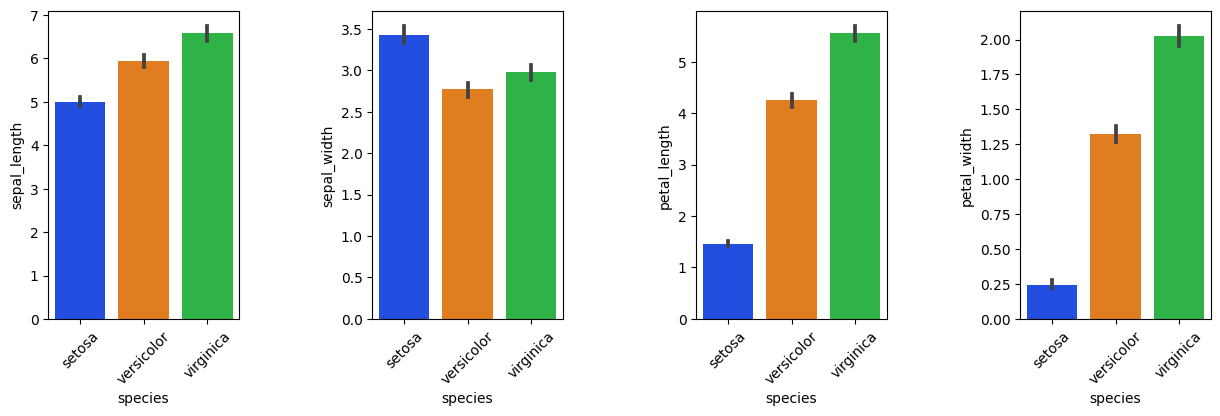

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(15,4))
for i, col in enumerate(df.columns[:4]):
    sns.barplot(ax=axes[i], y=col, x='species', data=df, palette='bright')
    axes[i].set_xticklabels(labels=species, rotation=45)

plt.subplots_adjust(wspace=0.7);